In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [6]:
url = 'C:\\Users\\makbulhussain.k\\Downloads\\pandas_exercises-master\\07_Visualization\\Online_Retail\\Online_Retail.csv'
online_rt = pd.read_csv(url,encoding='windows-1252')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
# group by the Country
countries = online_rt.groupby('Country').sum()
countries.head()

,Quantity,UnitPrice,CustomerID
Country,,,
Australia,83653,4054.75,15693002.0
Austria,4827,1701.52,5021102.0
Bahrain,260,86.57,210027.0
Belgium,23152,7540.13,25718288.0
Brazil,356,142.60,408608.0


In [12]:
# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]
countries

,Quantity,UnitPrice,CustomerID
Country,,,
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0
Belgium,23152,7540.13,25718288.0


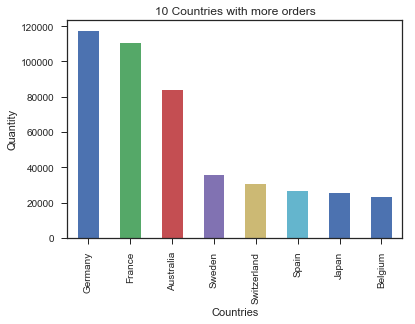

In [15]:
## Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK
# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with more orders')

# show the plot
plt.show()

In [14]:
# Exclude negative Quantity entries
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [16]:
 #Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

In [19]:
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [20]:
# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]
customers.head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [21]:
# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
customers['Country'].head()

CustomerID  Country       
12346.0     United Kingdom    United Kingdom
12347.0     Iceland                  Iceland
12348.0     Finland                  Finland
12349.0     Italy                      Italy
12350.0     Norway                    Norway
Name: Country, dtype: object

In [24]:
# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

In [25]:
# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

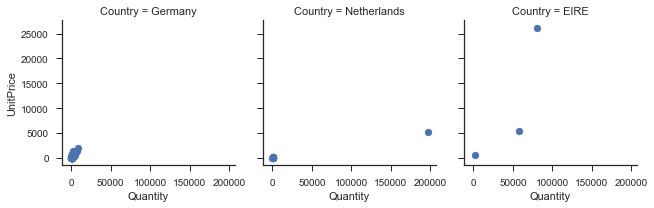

In [29]:
# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend();